<a href="https://colab.research.google.com/github/maazimam/Reinforcement-Learning-CPU-scheduler-/blob/main/RLresearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import random
def generate_process(n=10):
    processes = []
    for pid in range(1, n+1):
        arrival_time = random.randint(0, 10)
        burst_time = random.randint(1, 10)
        processes.append({'PID': pid, 'arrival': arrival_time, 'Burst': burst_time})
    return sorted(processes, key=lambda x: x['arrival'])

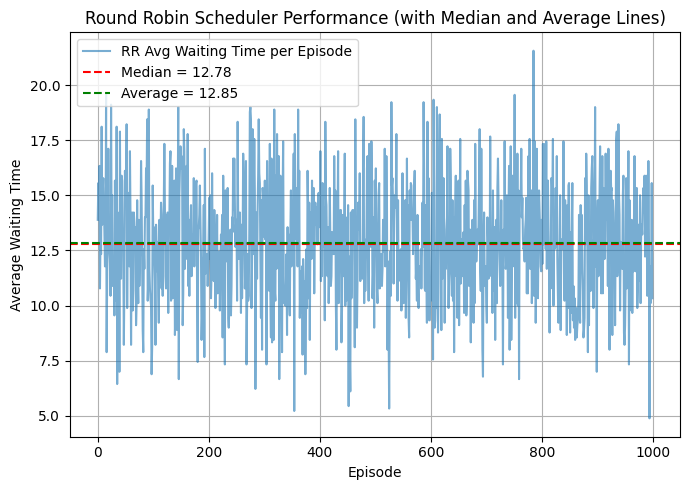

In [25]:
def round_robin(processes, quantum=4):
    time = 0
    queue = []
    waiting_time = {}
    remaining_burst = {p['PID']: p['Burst'] for p in processes}
    arrival_dict = {p['PID']: p['arrival'] for p in processes}
    completion_time = {}
    i = 0

    while i < len(processes) or queue:
        while i < len(processes) and processes[i]['arrival'] <= time:
            queue.append(processes[i]['PID'])
            i += 1

        if queue:
            pid = queue.pop(0)
            if pid not in waiting_time:
                waiting_time[pid] = time - arrival_dict[pid]

            exec_time = min(quantum, remaining_burst[pid])
            time += exec_time
            remaining_burst[pid] -= exec_time

            while i < len(processes) and processes[i]['arrival'] <= time:
                queue.append(processes[i]['PID'])
                i += 1

            if remaining_burst[pid] > 0:
                queue.append(pid)
            else:
                completion_time[pid] = time
        else:
            time += 1

    avg_waiting = sum(waiting_time.values()) / len(waiting_time)
    return avg_waiting

rr_performance = []
for _ in range(1000):
    processes = [{'PID': i, 'arrival': random.randint(0, 10), 'Burst': random.randint(1, 6)} for i in range(1, 10)]
    rr_wait = round_robin(processes.copy(), quantum=4)
    rr_performance.append(rr_wait)


median_rr = np.median(rr_performance)
average_rr = np.mean(rr_performance)

plt.figure(figsize=(7, 5))
plt.plot(rr_performance, alpha=0.6, label='RR Avg Waiting Time per Episode')
plt.axhline(median_rr, color='red', linestyle='--', label=f'Median = {median_rr:.2f}')
plt.axhline(average_rr, color='green', linestyle='--', label=f'Average = {average_rr:.2f}')
plt.xlabel('Episode')
plt.ylabel('Average Waiting Time')
plt.title('Round Robin Scheduler Performance (with Median and Average Lines)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
processes = generate_process()
print("Generated Processes:", processes)
avg_waiting_time = round_robin(processes)
print("Average Waiting Time:", avg_waiting_time)

Generated Processes: [{'PID': 4, 'arrival': 0, 'Burst': 7}, {'PID': 1, 'arrival': 2, 'Burst': 6}, {'PID': 3, 'arrival': 3, 'Burst': 5}, {'PID': 7, 'arrival': 4, 'Burst': 2}, {'PID': 2, 'arrival': 5, 'Burst': 6}, {'PID': 9, 'arrival': 6, 'Burst': 6}, {'PID': 5, 'arrival': 7, 'Burst': 8}, {'PID': 8, 'arrival': 8, 'Burst': 6}, {'PID': 10, 'arrival': 8, 'Burst': 9}, {'PID': 6, 'arrival': 10, 'Burst': 1}]
Average Waiting Time: 13.5


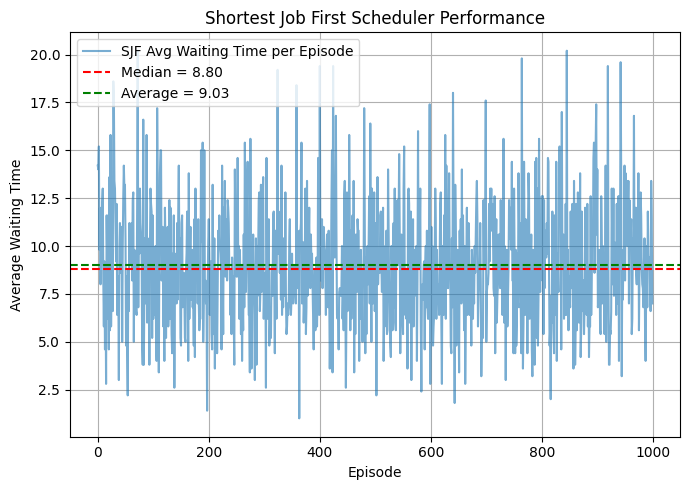

In [23]:

def sjf(processes):
    time = 0
    ready_queue = []
    waiting_time = {}
    completion_time = {}
    i = 0
    n = len(processes)

    while len(waiting_time) < n:
        while i < n and processes[i]['arrival'] <= time:
            ready_queue.append(processes[i])
            i += 1
        if ready_queue:
            ready_queue.sort(key=lambda p: p['Burst'])
            current = ready_queue.pop(0)
            waiting_time[current['PID']] = time - current['arrival']
            time += current['Burst']
            completion_time[current['PID']] = time
        else:
            time += 1

    avg_waiting = sum(waiting_time.values()) / len(waiting_time)
    return avg_waiting


sjf_performance = []
for _ in range(1000):
    processes = [{'PID': i, 'arrival': random.randint(0, 10), 'Burst': random.randint(1, 10)} for i in range(1, 6)]
    sjf_wait = sjf(processes.copy())
    sjf_performance.append(sjf_wait)


median_sjf = np.median(sjf_performance)
average_sjf = np.mean(sjf_performance)


plt.figure(figsize=(7, 5))
plt.plot(sjf_performance, alpha=0.6, label='SJF Avg Waiting Time per Episode')
plt.axhline(median_sjf, color='red', linestyle='--', label=f'Median = {median_sjf:.2f}')
plt.axhline(average_sjf, color='green', linestyle='--', label=f'Average = {average_sjf:.2f}')
plt.xlabel('Episode')
plt.ylabel('Average Waiting Time')
plt.title('Shortest Job First Scheduler Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
process_list = generate_process()
print("Generated Processes:")
for p in process_list:
    print(p)

rr_avg_wait = round_robin(process_list.copy(), quantum=4)
sjf_avg_wait = sjf(process_list.copy())

print("\nRound Robin:")
print("Average Waiting Time:", rr_avg_wait)


print("\nShortest Job First:")
print("Average Waiting Time:", sjf_avg_wait)



Generated Processes:
{'PID': 4, 'arrival': 0, 'Burst': 5}
{'PID': 5, 'arrival': 0, 'Burst': 10}
{'PID': 7, 'arrival': 0, 'Burst': 7}
{'PID': 8, 'arrival': 0, 'Burst': 2}
{'PID': 9, 'arrival': 0, 'Burst': 10}
{'PID': 10, 'arrival': 1, 'Burst': 5}
{'PID': 2, 'arrival': 4, 'Burst': 5}
{'PID': 3, 'arrival': 4, 'Burst': 10}
{'PID': 1, 'arrival': 6, 'Burst': 9}
{'PID': 6, 'arrival': 9, 'Burst': 2}

Round Robin:
Average Waiting Time: 15.0

Shortest Job First:
Average Waiting Time: 19.1


Training RL CPU Scheduler...
Episode 100: Recent avg waiting time = 7.48
Episode 200: Recent avg waiting time = 7.49
Episode 300: Recent avg waiting time = 7.36
Episode 400: Recent avg waiting time = 7.80
Episode 500: Recent avg waiting time = 7.90
Episode 600: Recent avg waiting time = 7.89
Episode 700: Recent avg waiting time = 7.76
Episode 800: Recent avg waiting time = 7.52
Episode 900: Recent avg waiting time = 7.28
Episode 1000: Recent avg waiting time = 7.72
Training completed! Q-table has 3040 states


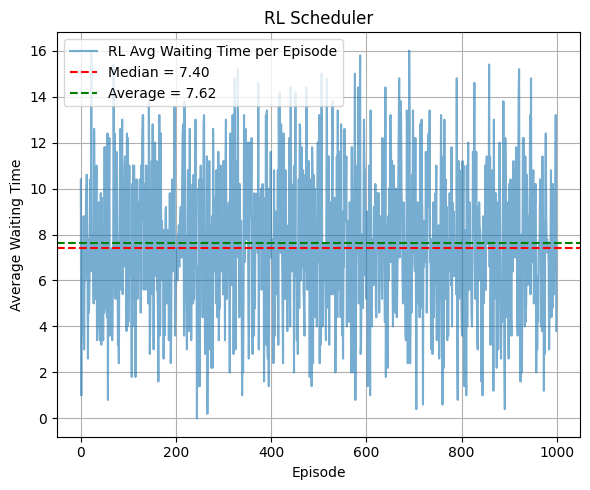

In [12]:
# Re-import necessary modules after code reset
import random
import matplotlib.pyplot as plt
import numpy as np

# Redefine the RLScheduler class with median line addition
class RLScheduler:
    def __init__(self):
        self.alpha = 0.3
        self.gamma = 0.95
        self.epsilon = 0.3
        self.Q = {}

    def get_state(self, ready_queue, current_time):
        return tuple(sorted((p["Burst"], current_time - p["arrival"]) for p in ready_queue))

    def train(self, episodes=1000):
        training_performance = []

        print("Training RL CPU Scheduler...")

        for episode in range(episodes):
            processes = []
            for pid in range(1, 6):
                arrival_time = random.randint(0, 10)
                burst_time = random.randint(1, 10)
                processes.append({'PID': pid, 'arrival': arrival_time, 'Burst': burst_time})

            processes.sort(key=lambda x: x['arrival'])

            time = 0
            ready_queue = []
            completed = []

            while len(completed) < len(processes):
                for p in processes:
                    if (p["arrival"] <= time and
                        p not in ready_queue and
                        p["PID"] not in [c["PID"] for c in completed]):
                        ready_queue.append(p)

                if not ready_queue:
                    time += 1
                    continue

                state = self.get_state(ready_queue, time)

                if state not in self.Q or len(self.Q[state]) != len(ready_queue):
                    self.Q[state] = [0.0 for _ in range(len(ready_queue))]

                if random.random() < self.epsilon:
                    action = random.randint(0, len(ready_queue) - 1)
                else:
                    action = self.Q[state].index(max(self.Q[state]))

                current = ready_queue.pop(action)
                waiting_time = time - current["arrival"]
                reward = -waiting_time - sum(time - p["arrival"] for p in ready_queue)

                time += current["Burst"]
                completed.append({'PID': current["PID"], 'waiting_time': waiting_time})

                if ready_queue:
                    next_state = self.get_state(ready_queue, time)
                    if next_state not in self.Q or len(self.Q[next_state]) != len(ready_queue):
                        self.Q[next_state] = [0.0 for _ in range(len(ready_queue))]
                    next_max = max(self.Q[next_state]) if self.Q[next_state] else 0
                else:
                    next_max = 0

                old_value = self.Q[state][action]
                self.Q[state][action] = old_value + self.alpha * (reward + self.gamma * next_max - old_value)

            avg_waiting = sum(p["waiting_time"] for p in completed) / len(completed)
            training_performance.append(avg_waiting)

            self.epsilon = max(0.01, self.epsilon * 0.995)

            if (episode + 1) % 100 == 0:
                recent_avg = sum(training_performance[-100:]) / min(100, len(training_performance))
                print(f"Episode {episode + 1}: Recent avg waiting time = {recent_avg:.2f}")

        print(f"Training completed! Q-table has {len(self.Q)} states")
        return training_performance

# Run training again
rl_scheduler = RLScheduler()
training_performance = rl_scheduler.train(episodes=1000)

# Plot the training curve with median line
median_performance = np.median(training_performance)
average_performance = np.mean(training_performance)

plt.figure(figsize=(6, 5))
plt.plot(training_performance, alpha=0.6, label='RL Avg Waiting Time per Episode')
plt.axhline(median_performance, color='red', linestyle='--', label=f'Median = {median_performance:.2f}')
plt.axhline(average_performance, color='green', linestyle='--', label=f'Average = {average_performance:.2f}')
plt.xlabel('Episode')
plt.ylabel('Average Waiting Time')
plt.title('RL Scheduler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

